In [26]:
import pandas as pd

add="D:/datasets/kaggle/Credit Card Fraud Detection/creditcard.csv"
df=pd.read_csv(add, header=0, sep=',')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


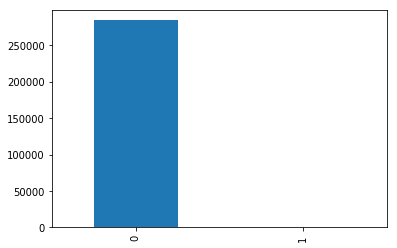

In [29]:
import matplotlib.pyplot as plt
df.Class.value_counts().plot(kind='bar')
plt.show()

In [30]:
ratio=df.Class.value_counts()[1]/df.shape[0]

In [31]:
from scipy.stats import skew, boxcox
#highly skewed data
skew(df.Amount)

16.97763503663315

In [32]:
#boxcox transformation to obtain best power
boxcox(df.Amount+10**(-50))[1]

0.11473731838330946

In [33]:
import numpy as np
df['Amount']=np.power(df.Amount.values,1/10)

#it is suspicious that the amount of transaction is zero. The fraud rate among transactions with zero amount 
#is higher than the rate among whole date. Having zero amount may be a new categorical feature

df['zero_amount']=df.Amount.apply(lambda x:1 if x==0 else 0)
cols=df.columns
cols=list(cols[:-2])+['zero_amount','Class']
df=df[cols]

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1] , test_size=0.2, shuffle=True, stratify= df.iloc[:,[-2,-1]] , random_state=42)

In [37]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)


In [38]:
# tune parameter max_samples


recall_scores={maxsamples:[] for maxsamples in [500,2000,8000,15000,30000]}
accuracy_scores={maxsamples:[] for maxsamples in [500,2000,8000,15000,30000]}




for train_index, test_index in skf.split(X_train, y_train):
    for maxsamples in [500,2000,8000,15000,30000]:
        isf=IsolationForest(n_estimators=300, contamination=ratio, max_samples=maxsamples,random_state=34)

        isf.fit(X_train.iloc[train_index])
        test_labels=isf.predict(X_train.iloc[test_index])
        test_labels[test_labels==1]=0
        test_labels[test_labels==-1]=1
        recall_scores[maxsamples].append(recall_score(y_train.iloc[test_index], test_labels))
        accuracy_scores[maxsamples].append(accuracy_score(y_train.iloc[test_index], test_labels))
    




D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklea

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklea

Text(0.5,1,'sub-sample vs accuracy scores')

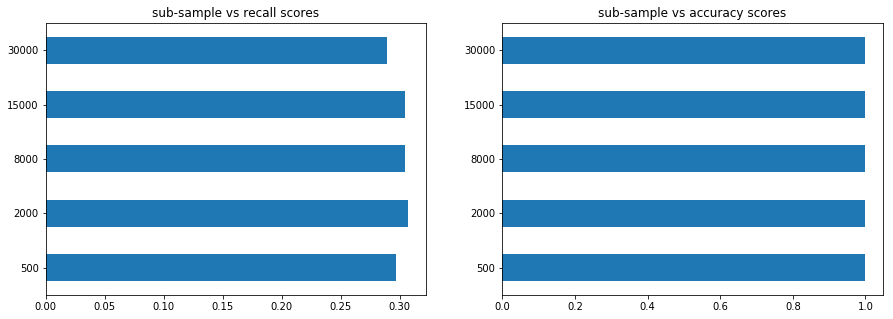

In [39]:


plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
pd.Series([np.mean(recall_scores[maxsamples]) for maxsamples in [500,2000,8000,15000,30000]], index=[500,2000,8000,15000,30000]).plot(kind='barh')
plt.title('sub-sample vs recall scores')
plt.subplot(122)
pd.Series([np.mean(accuracy_scores[maxsamples]) for maxsamples in [500,2000,8000,15000,30000]], index=[500,2000,8000,15000,30000]).plot(kind='barh')
plt.title('sub-sample vs accuracy scores')


In [40]:
# tune parameter max_features


recall_scores={maxfeature:[] for maxfeature in [0.2,0.5,0.8,1.0]}
accuracy_scores={maxfeature:[] for maxfeature in [0.2,0.5,0.8,1.0]}




for train_index, test_index in skf.split(X_train, y_train):
    for maxfeature in [0.2,0.5,0.8,1.0]:
        isf=IsolationForest(n_estimators=300, contamination=ratio, max_samples=2000,max_features=maxfeature,random_state=34)

        isf.fit(X_train.iloc[train_index])
        test_labels=isf.predict(X_train.iloc[test_index])
        test_labels[test_labels==1]=0
        test_labels[test_labels==-1]=1
        recall_scores[maxfeature].append(recall_score(y_train.iloc[test_index], test_labels))
        accuracy_scores[maxfeature].append(accuracy_score(y_train.iloc[test_index], test_labels))
    




D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklea

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklea

Text(0.5,1,'max features vs accuracy scores')

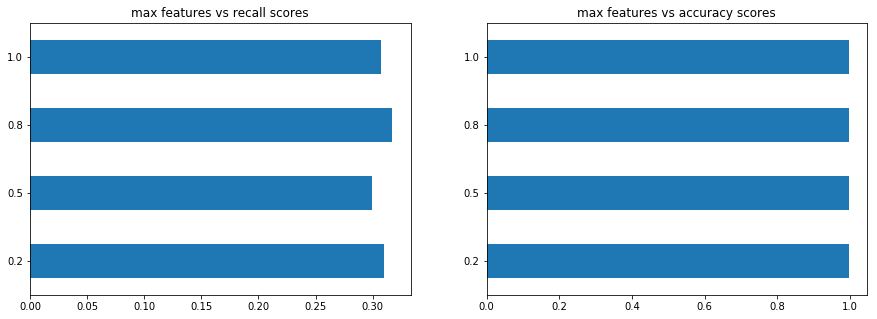

In [41]:


plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
pd.Series([np.mean(recall_scores[maxfeature]) for maxfeature in [0.2,0.5,0.8,1.0]], index=[0.2,0.5,0.8,1.0]).plot(kind='barh')
plt.title('max features vs recall scores')
plt.subplot(122)
pd.Series([np.mean(accuracy_scores[maxfeature]) for maxfeature in [0.2,0.5,0.8,1.0]], index=[0.2,0.5,0.8,1.0]).plot(kind='barh')
plt.title('max features vs accuracy scores')


In [42]:
        
    
    

isf=IsolationForest(n_estimators=300, contamination=ratio, max_samples=2000,max_features=0.8,random_state=34)

isf.fit(X_train)
test_labels=isf.predict(X_test)
test_labels[test_labels==1]=0
test_labels[test_labels==-1]=1
print(recall_score(y_test, test_labels))
print(accuracy_score(y_test, test_labels))
    

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0.41836734693877553
0.9978757768336786


In [43]:
print(classification_report(y_test, test_labels,digits=5))

              precision    recall  f1-score   support

           0    0.99900   0.99887   0.99894     56864
           1    0.39048   0.41837   0.40394        98

   micro avg    0.99788   0.99788   0.99788     56962
   macro avg    0.69474   0.70862   0.70144     56962
weighted avg    0.99795   0.99788   0.99791     56962



Isolation Forest improve recall score substantially compared to the result provided by LOF.